In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split


In [35]:
data = pd.read_csv('C:/Users/hello/Desktop/heart_data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1.0,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0.0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0.0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0.0,159,0,0.0,2,0,2,1


In [36]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
data["restecg"].fillna(data["restecg"].median(), inplace=True)
data["oldpeak"].fillna(data["oldpeak"].median(), inplace=True)


C:\Users\hello\AppData\Local\Temp\ipykernel_21732\983960953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["restecg"].fillna(data["restecg"].median(), inplace=True)
C:\Users\hello\AppData\Local\Temp\ipykernel_21732\983960953.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [38]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [39]:
print(data.duplicated().sum())

721


In [40]:
data.drop_duplicates(inplace=True)

In [41]:
print(data.duplicated().sum())

0


In [10]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,44,0,2,108,141,0,1.0,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1.0,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0.0,125,0,0.0,2,0,2,0
873,57,1,0,140,192,0,1.0,148,0,0.4,1,0,1,1


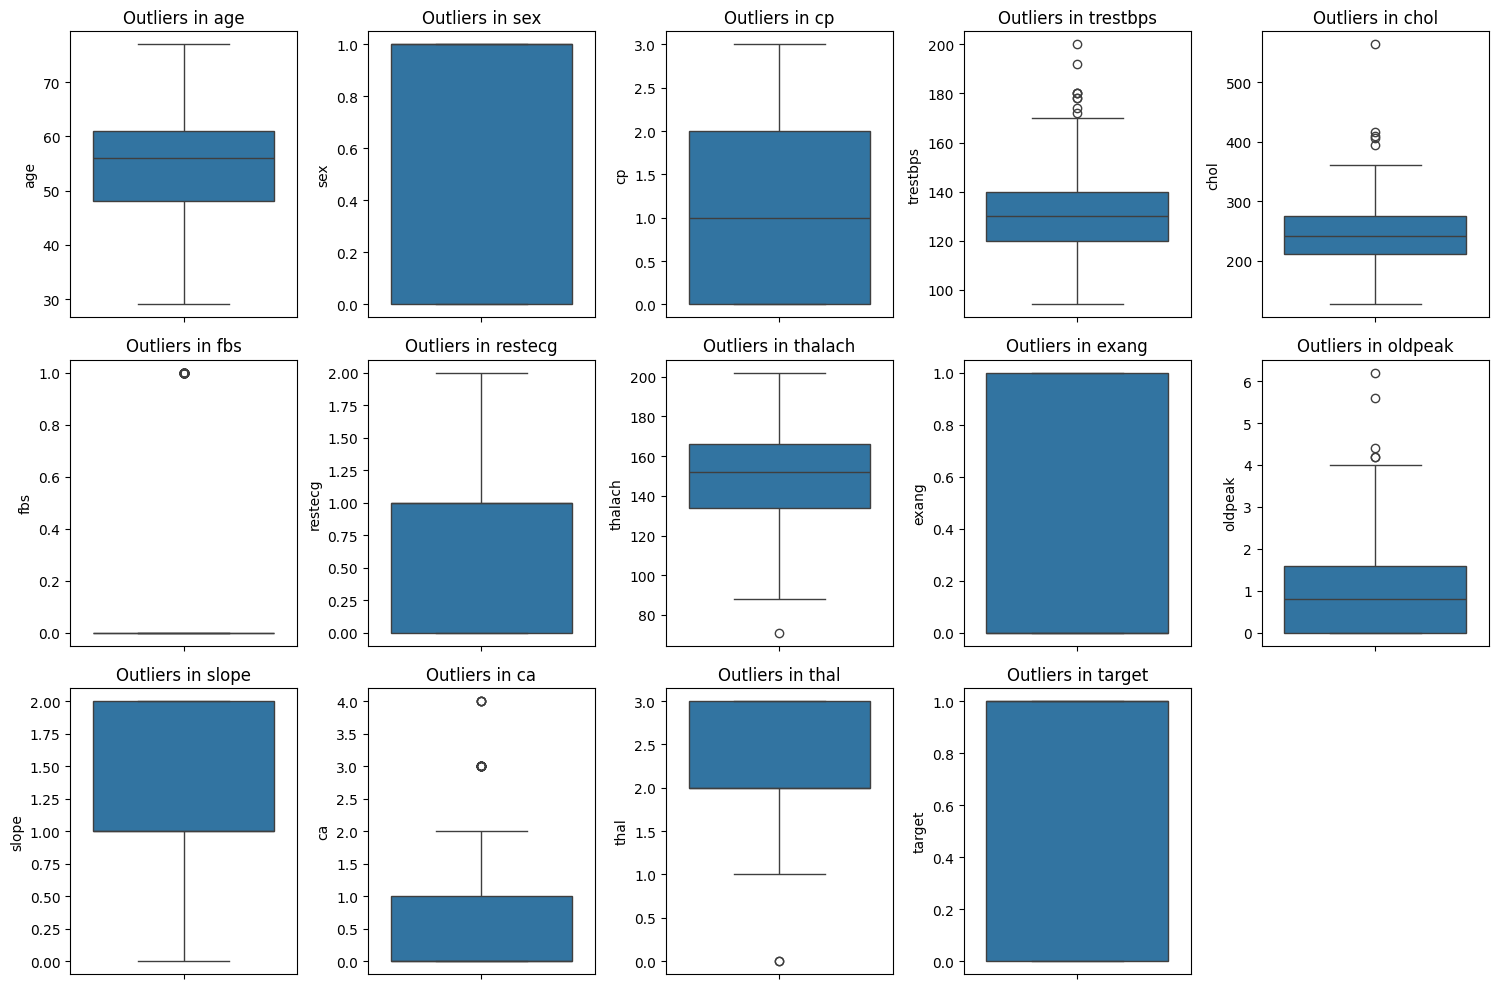

In [42]:
# Outliers
numeric_cols = data.select_dtypes(include=['number']).columns 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

In [45]:
print(data['sex'].unique())
print(data['thal'].unique())


[1 0]
[3 2 1]


In [46]:
print(data[(data['age'] < 0) | (data['age'] > 120)])

print(data[(data['trestbps'] < 80) | (data['trestbps'] > 200)])


Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [47]:
for col in data.columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())
    print('------------------------')


Unique values in age:
[52 70 61 58 55 46 54 71 34 51 50 60 67 45 63 42 44 57 59 64 65 41 66 56
 48 29 37 47 62 53 76 43 40 39 49 35 38 74 68 69]
------------------------
Unique values in sex:
[1 0]
------------------------
Unique values in cp:
[0 1 2 3]
------------------------
Unique values in trestbps:
[125 145 148 100 160 120 122 112 118 140 124 106 104 135 130 129 150 138
 128 132 146 152 154 170 136 134 108 123 110 142  94 115 102 144 126 105
 155 156]
------------------------
Unique values in chol:
[212 174 203 248 289 249 286 149 210 308 266 244 185 223 208 252 209 307
 233 169 131 269 196 231 213 271 263 229 360 258 330 342 226 278 241 193
 245 232 204 299 288 315 215 326 207 177 257 187 201 220 268 267 236 303
 282 197 309 186 275 281 206 335 254 295 260 240 302 192 256 235 274 234
 182 167 172 321 300 199 157 222 184 354 160 247 239 246 211 293 180 250
 221 318 200 227 243 311 261 242 306 219 353 198 183 224 228 313 340 259
 270 325 294 264 276 214 273 253 230 175 284 218 265

In [43]:

# Select numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Remove outliers
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]



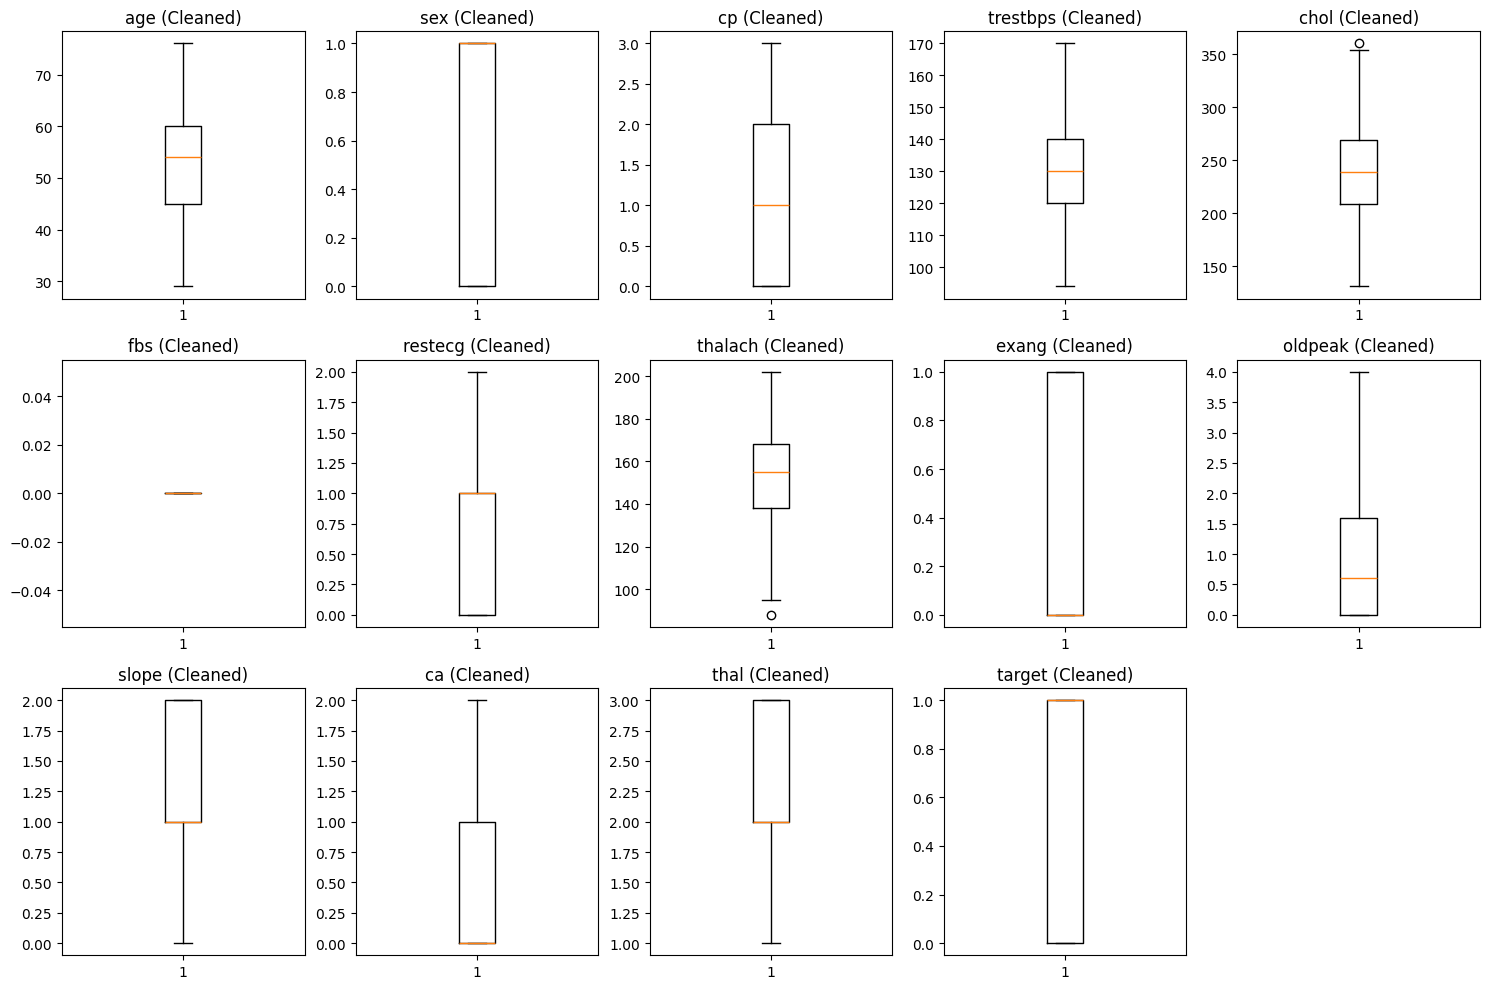

In [44]:

# Plot boxplots after cleaning
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 5, i + 1)
    plt.boxplot(data[col])
    plt.title(f'{col} (Cleaned)')
plt.tight_layout()
plt.show()

In [ ]:

X = data.drop('target', axis=1)  
y = data['target']               


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"\nAUC-ROC: {roc_auc:.2f}")


Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        29
           1       0.77      0.93      0.84        40

    accuracy                           0.80        69
   macro avg       0.81      0.77      0.78        69
weighted avg       0.81      0.80      0.79        69


Confusion Matrix:
[[18 11]
 [ 3 37]]

AUC-ROC: 0.85


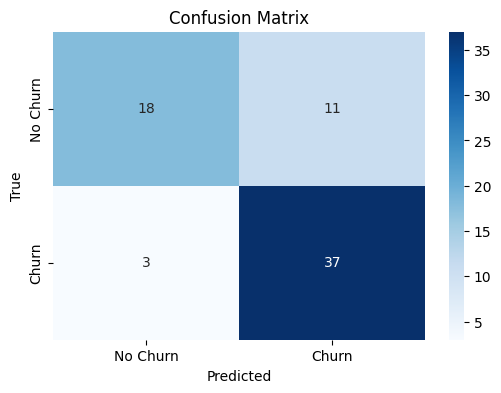

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")



c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best parameters: {'C': 1, 'solver': 'liblinear'}
Best score: 0.85


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7971014492753623
Random Forest Confusion Matrix:
[[18 11]
 [ 3 37]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7681159420289855
Gradient Boosting Confusion Matrix:
[[20  9]
 [ 7 33]]


In [58]:
from sklearn.metrics import classification_report

# Logistic Regression Evaluation
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred))

# Random Forest Evaluation
print("Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))

# Gradient Boosting Evaluation
print("Gradient Boosting Evaluation:")
print(classification_report(y_test, y_pred_gb))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        29
           1       0.77      0.93      0.84        40

    accuracy                           0.80        69
   macro avg       0.81      0.77      0.78        69
weighted avg       0.81      0.80      0.79        69

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        29
           1       0.77      0.93      0.84        40

    accuracy                           0.80        69
   macro avg       0.81      0.77      0.78        69
weighted avg       0.81      0.80      0.79        69

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.79      0.82      0.80        40

    accuracy                           0.77        69
   macro avg       0.76      0.76      0